In [7]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# Load the dataset from the text file
dataset_path = r'C:\Users\nikhil kumar\OneDrive\Desktop\Cyfuture\train_snli.txt'  # Replace with your file path
data = pd.read_csv(dataset_path, sep="\t", header=None, names=["text1", "text2", "label"])

In [9]:
data.head()

,text1,text2,label
0,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
1,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
2,Children smiling and waving at camera,There are children present,1
3,Children smiling and waving at camera,The kids are frowning,0
4,A boy is jumping on skateboard in the middle o...,The boy skates down the sidewalk.,0


In [10]:
# Convert labels to integer
data['label'] = data['label'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367373 entries, 0 to 367372
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text1   367373 non-null  object
 1   text2   367369 non-null  object
 2   label   367373 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ MB


In [12]:
# Check for NaN values in each column
print(data.isnull().sum())

text1    0
text2    4
label    0
dtype: int64


In [13]:
data['text2'] = data['text2'].fillna('')  # Fill NaN in 'text2'

In [14]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()

# Vectorize the two text columns separately
tfidf_text1 = vectorizer.fit_transform(data['text1'])
tfidf_text2 = vectorizer.transform(data['text2'])

In [15]:
tfidf_text2,tfidf_text1

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 2187760 stored elements and shape (367373, 17956)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 3888227 stored elements and shape (367373, 17956)>)

In [16]:
# Combine the two vectors (e.g., using absolute difference)
features = abs(tfidf_text1 - tfidf_text2)

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7823341272541681
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78     36795
           1       0.77      0.81      0.79     36680

    accuracy                           0.78     73475
   macro avg       0.78      0.78      0.78     73475
weighted avg       0.78      0.78      0.78     73475



In [19]:
# Test the model with a custom input
sample_text1 = "A man and a woman cross the street in front of a pizza and gyro restaurant."
sample_text2 = "The people are standing still on the curb."
sample_vector1 = vectorizer.transform([sample_text1])
sample_vector2 = vectorizer.transform([sample_text2])
sample_features = abs(sample_vector1 - sample_vector2)
sample_prediction = model.predict(sample_features)

print(f"Prediction: {'Plagiarized' if sample_prediction[0] == 1 else 'Not Plagiarized'}")

Prediction: Not Plagiarized


In [20]:
# prompt: i walso calcilate probablity of output

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ... (Your existing code) ...

# ... (Your existing code) ...

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Assuming binary classification (0 or 1)
# The probability of class 1 (plagiarized) is in the second column of y_pred_proba
probability_of_plagiarism = y_pred_proba[:, 1]

# Print probabilities for each prediction
#for i in range (len(y_pred)):
#  print(f"Prediction: {y_pred[i]}, Probability: {probability_of_plagiarism[i]}")

# Example of getting probability for a single custom input
sample_text1 = "A man and a woman cross the street in front of a pizza and gyro restaurant."
sample_text2 = "The people are standing still on the curb."
sample_vector1 = vectorizer.transform([sample_text1])
sample_vector2 = vectorizer.transform([sample_text2])
sample_features = abs(sample_vector1 - sample_vector2)
sample_prediction = model.predict(sample_features)
sample_prediction_proba = model.predict_proba(sample_features)

print(f"Prediction: {'Plagiarized' if sample_prediction[0] == 1 else 'Not Plagiarized'}")
print(f"Probability of Plagiarism: {sample_prediction_proba[0][1]}")


# Calculate and print the average probability for the test set
average_probability = np.mean(probability_of_plagiarism)
print(f"Average Probability of Plagiarism for the Test Set: {average_probability}")


Prediction: Not Plagiarized
Probability of Plagiarism: 0.08677414262545917
Average Probability of Plagiarism for the Test Set: 0.5009681355375288


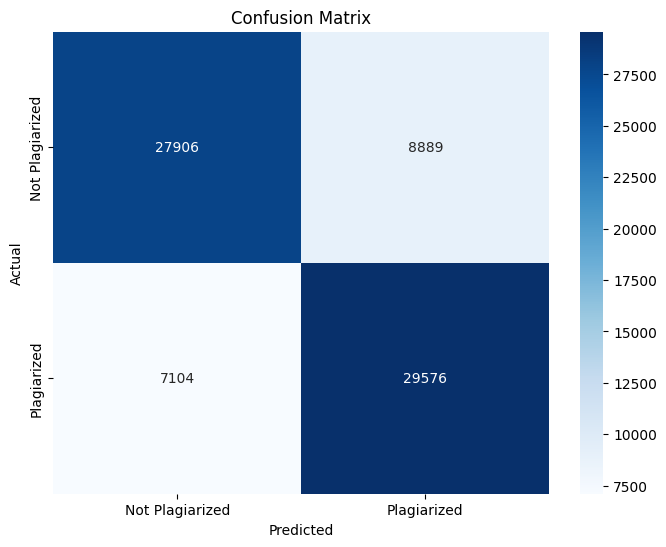

In [21]:
# prompt: print  confysion matrrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Not Plagiarized', 'Plagiarized'],
            yticklabels=['Not Plagiarized', 'Plagiarized'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
